In [3]:
import torch
import pickle
import matplotlib.pyplot as plt

In [ ]:
# 어떤 함수에 의해서 입력된 이미지가 손상되었다면
# 반대로 랜덤한 이미지를 넣었을 때 해당 함수를 거쳐 같은 결과를 만들어낸다면
# 원본 이미지를 찾을 수 있다.

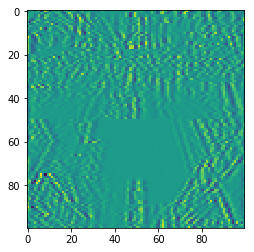

In [4]:
# 행렬로 표현되어 있는 이미지 읽어오기
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1')) # tensor로 가져온다.

plt.imshow(broken_image.view(100, 100))

In [5]:
# 손상된 이미지를 만드는 함수 weired_function
def weired_function(x, n_iter=5) :
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [6]:
# 오차를 구하는 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

# random tensor
random_tensor = torch.randn(10000, dtype=torch.float)

In [7]:
# learning rate
lr = 0.8

In [15]:
# 학습, 학습은 반복만큼 이루어져야 한다.
for i in range(0, 20000):
    # random_tensor로 미분할 것이기 때문에 requires_grad 옵션을 True로 설정
    random_tensor.requires_grad_(True)
    # 예측 이미지
    hypothesis = weired_function(random_tensor)
    # loss와 학습 진행
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.3389253616333
Loss at 1000 = 1.1054370403289795
Loss at 2000 = 0.532608151435852
Loss at 3000 = 0.37291914224624634
Loss at 4000 = 0.2960910499095917
Loss at 5000 = 0.24847202003002167
Loss at 6000 = 0.21420083940029144
Loss at 7000 = 0.1869940459728241
Loss at 8000 = 0.16393114626407623
Loss at 9000 = 0.14349506795406342
Loss at 10000 = 0.12482389807701111
Loss at 11000 = 0.1073933020234108
Loss at 12000 = 0.09086596220731735
Loss at 13000 = 0.07501565665006638
Loss at 14000 = 0.05968582257628441
Loss at 15000 = 0.04476593807339668
Loss at 16000 = 0.03017900511622429
Loss at 17000 = 0.02115022763609886
Loss at 18000 = 0.0211653970181942
Loss at 19000 = 0.021167227998375893


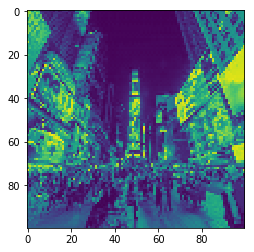

In [16]:
plt.imshow(random_tensor.view(100, 100).data)